# Hierarchical Reinforcement Learning Explains Task Interleaving Behavior

This jupyter notebook provides a brief introduction on how to use the HRL model of the paper [HRL Explains Task Interleaving Behavior](https://doi.org/10.1007/s42113-020-00093-9). To understand the code structure itself, please refer to the in-code documentation of the respective python classes.

To use the model we first need to import the class that manages learning and execution of the HRL agent as well as other scripts that offer utility functions.

In [1]:
from LearnTaskSwitching import LearnTaskSwitching
from plot_utilities import plot_reward_learning, plot_policy, plot_in_task_state_value_functions, plot_high_level_state_value_functions, plot_task_environment
from utils import get_agent_state_value_functions, load_pkl_file, add_trajectories_to_task, add_state_distribution_to_task

After that we specify the files that constitute the RL environment of the agent:

In [2]:
participant_name = "0B8VVB89"

# files necessary to simulate the RL environment of the agent
task_file = "data/environments/" + participant_name + "_train_env.pkl"
trajectory_file = 'data/trajectories/' + participant_name + '_train.pkl'
state_distribution_file = 'data/distributions/' + participant_name + '_state.pkl'
# environment file for testing
test_file = "data/environments/" + participant_name + "_test_env.pkl"

Then we specify the parameters of the model:

In [7]:
# execution control
verbose_switching = 1

# learning parameters
num_episodes = 250              # number of episodes
learn_pursue_costs = True       # flag indicating that resumption costs are considered on the lower level
learn_switch_costs = True       # flag indicating that resumption costs are considered on the higher level
is_reward_from_obs = True       # flag indicating that reward comes from collected trajectories of participant
is_smdp = True                  # flag indicating that underlying decision process is an SMDP

After that, we build the RL environment of our agent that represents one participant of our study. Thus, the necessary instances are loaded from serialized pickle files. To visualize the environment, we plot all its including tasks.

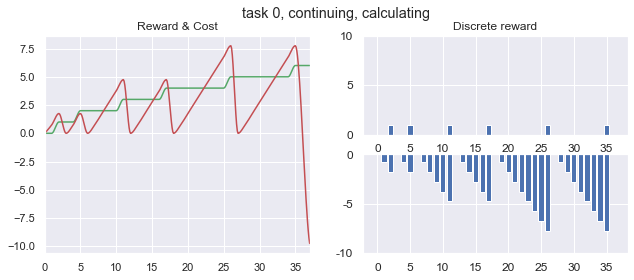

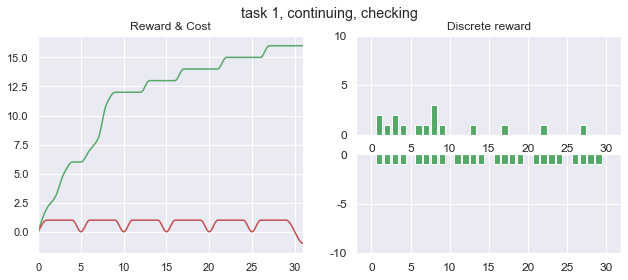

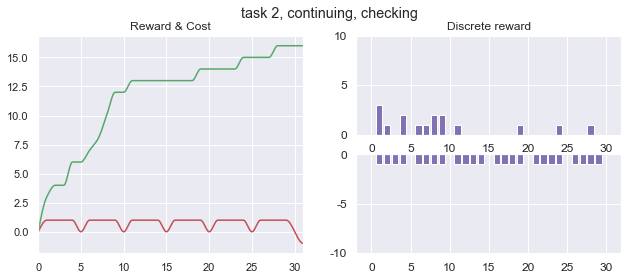

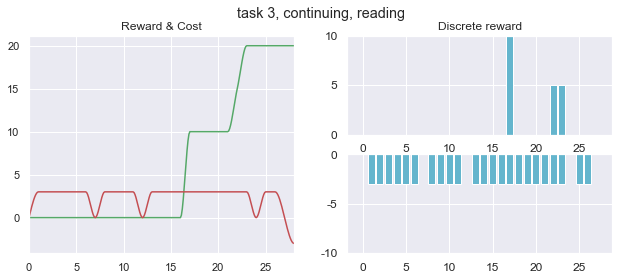

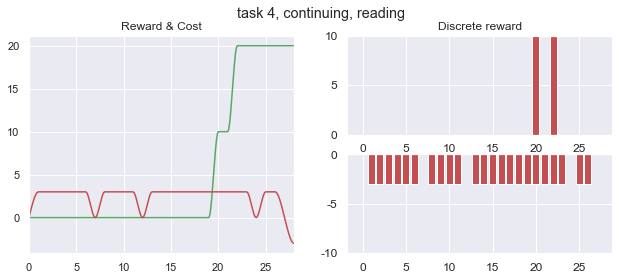

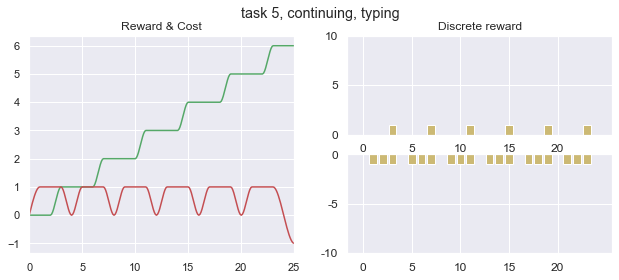

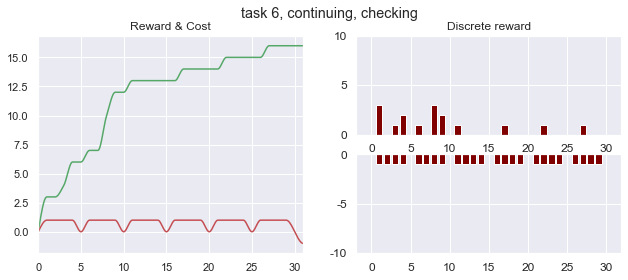

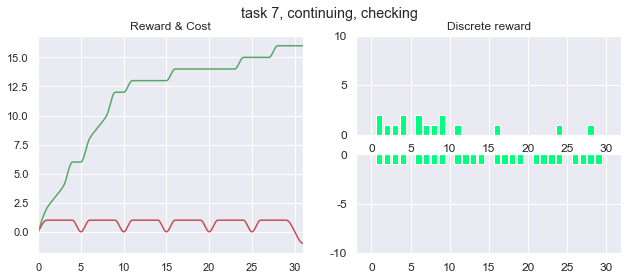

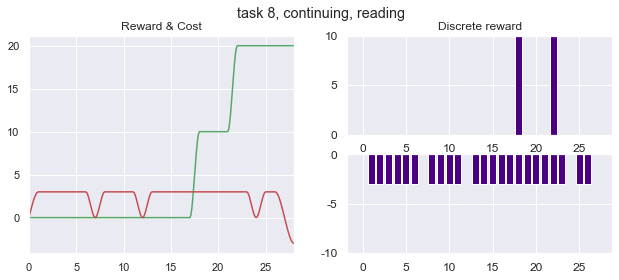

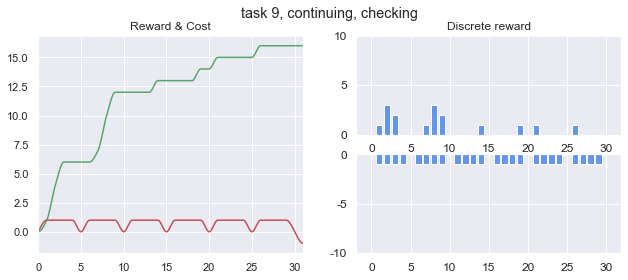

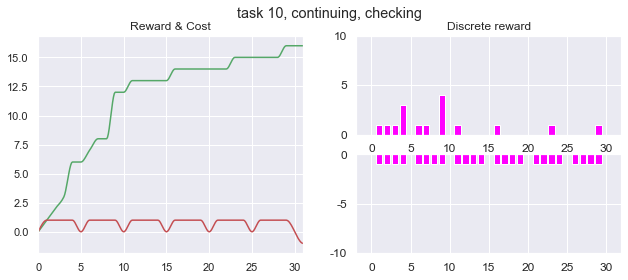

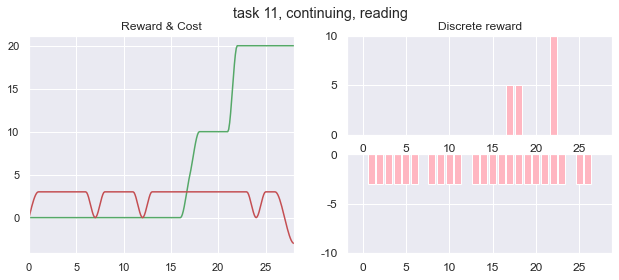

In [4]:
# load pickle files
task_list = load_pkl_file(task_file)
distribution_list = load_pkl_file(state_distribution_file)
trajectory_list = load_pkl_file(trajectory_file)

add_state_distribution_to_task(task_list, distribution_list)
add_trajectories_to_task(task_list, trajectory_list)

# Visualize environment
plot_task_environment(task_list)

Next we initialize the learning manager:

In [5]:
learning_manager = LearnTaskSwitching(task_list, num_episodes=num_episodes, verbose_switching=verbose_switching,
                                      learn_pursue_costs=learn_pursue_costs, learn_switch_costs=learn_switch_costs,
                                      is_reward_from_obs=is_reward_from_obs)

calculating max state in traj: [36] / 36
calculating task length: 37
checking max state in traj: [30] / 30
checking task length: 31
checking max state in traj: [30] / 30
checking task length: 31
reading max state in traj: [27] / 27
reading task length: 28
reading max state in traj: [27] / 27
reading task length: 28
typing max state in traj: [24] / 24
typing task length: 25
checking max state in traj: [30] / 30
checking task length: 31
checking max state in traj: [30] / 30
checking task length: 31
reading max state in traj: [27] / 27
reading task length: 28
checking max state in traj: [30] / 30
checking task length: 31
checking max state in traj: [30] / 30
checking task length: 31
reading max state in traj: [27] / 27
reading task length: 28


After that we can now learn the HRL-agent and then plot the attained learning curve:

0% completed
10% completed
20% completed
30% completed
40% completed
50% completed
60% completed
70% completed
80% completed
90% completed
100% completed


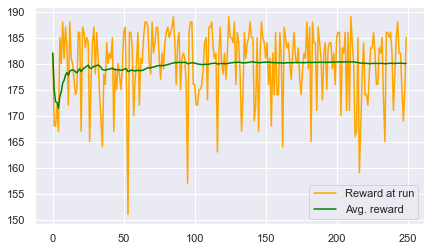

In [8]:
# learn task switching policy
reward_per_episode, avg_reward_per_episode = learning_manager.learn_task_switching_policy()
plot_reward_learning(reward_per_episode, expected_reward_array=avg_reward_per_episode, plot_title="learning curve")

With the learned task interleaving agent we can now test its performance in another enviornment. Thus, we first load the tasks of a participant's test enviornment. Then, we attain the state value functions of the learned HRL agent. Finally, we initialize an instance of LearnTaskSwitching with the test environment relying on the learned state value functions.

In [9]:
# get the tasks of the test environment
test_task_list = load_pkl_file(test_file)
add_trajectories_to_task(test_task_list, trajectory_list)
add_state_distribution_to_task(test_task_list, distribution_list)
# uncomment the following line to visualize the tasks of the test environment
#plot_task_environment(test_task_list)

# get state value functions form trained HRL agent
learned_functions = get_agent_state_value_functions(learning_manager)
# create the learning manager for the test environment
testing_manager = LearnTaskSwitching(test_task_list, is_smdp=is_smdp, verbose_switching=verbose_switching,
                                     init_functions=learned_functions)

calculating max state in traj: [36] / 36
calculating task length: 37
calculating max state in traj: [36] / 36
calculating task length: 37
checking max state in traj: [30] / 30
checking task length: 31
checking max state in traj: [30] / 30
checking task length: 31
reading max state in traj: [27] / 27
reading task length: 28
typing max state in traj: [24] / 24
typing task length: 25


Finally, we execute the learned optimal policy in the test environment and plot the sequence of traversed task states. We activate pop up plots (%matplotlib qt) such that you can zoom into the sequence and at each step see which task was executed (format at each step: task,subtask). Furthermore, in the console output you can find a legend to the plot which details the task id, the task type, and its color (abbreviation) in the plot.

In [10]:
# activate pop up plots
%matplotlib qt
plot_policy(testing_manager)

avg. reward per step: 0.006514956872820701



AttributeError: 'TaskSwitching' object has no attribute 'task_colors'

To inspect our results further, we can plot the in-task state value functions (lower-level) and the state value functions of the task interleaving level (higher level) of the HRL agent. From the plots of the lower-level, you can see a similarity between state value functions and the reward- and cost-functions of the tasks in the environment (i.e., the agent learned to pick up subtask boundaries and rewards). Also, note that tasks on the higher-level do not have a separate "leave"-action.

In [ ]:
plot_in_task_state_value_functions(testing_manager)
plot_high_level_state_value_functions(testing_manager) 